In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [42]:

data = pd.read_csv('../spam_or_not_spam.csv')


In [39]:
data_cleaned = data.dropna(subset=['email', 'label'])



In [44]:

X = data_cleaned['email']
y = data_cleaned['label']


In [46]:
X


0        date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...
1       martin a posted tassos papadopoulos the greek ...
2       man threatens explosion in moscow thursday aug...
3       klez the virus that won t die already the most...
4        in adding cream to spaghetti carbonara which ...
                              ...                        
2995     abc s good morning america ranks it the NUMBE...
2996     hyperlink hyperlink hyperlink let mortgage le...
2997     thank you for shopping with us gifts for all ...
2998     the famous ebay marketing e course learn to s...
2999     hello this is chinese traditional 子 件 NUMBER世...
Name: email, Length: 2999, dtype: object

In [47]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [51]:
j=0
for i in y_test:
  if i==0:
    j=j+1
print(j)

500


In [52]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [53]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)


MultinomialNB()

In [54]:
y_pred = classifier.predict(X_test_vectorized)


In [55]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9883333333333333
Confusion Matrix:
[[500   0]
 [  7  93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       500
           1       1.00      0.93      0.96       100

    accuracy                           0.99       600
   macro avg       0.99      0.97      0.98       600
weighted avg       0.99      0.99      0.99       600



In [56]:
import joblib

# Save the trained model
joblib.dump(classifier, '../spam_classifier_model.joblib')

# Save the vectorizer as well, if needed
joblib.dump(vectorizer, '../text_vectorizer.joblib')

['../text_vectorizer.joblib']

In [58]:
# Load the trained model
classifier = joblib.load('../spam_classifier_model.joblib')

# Load the vectorizer, if needed
vectorizer = joblib.load('../text_vectorizer.joblib')

In [60]:
dataset = pd.read_csv('../mail_data.csv')

EDA de dataset avant le passer par notre model

In [65]:
dataset.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [67]:
dataset = dataset.dropna(subset=['Category', 'Message'])

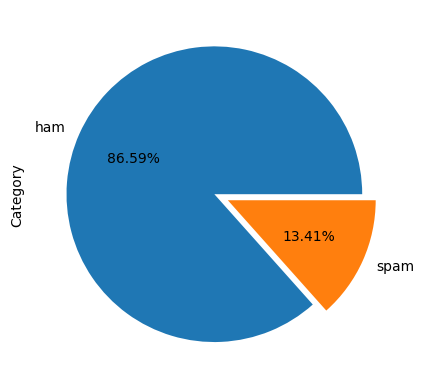

In [69]:
dataset.Category.value_counts().plot.pie(autopct='%1.2f%%',radius=1,explode=[0,0.1]);

In [73]:
dataToPredict = dataset["Message"] # lets take only emails

In [74]:
dataToPredict_vectorized = vectorizer.transform(dataToPredict)


# Make predictions
predictions = classifier.predict(dataToPredict_vectorized)

# Collect emails and predictions in a list
email_predictions = list(zip(dataToPredict, predictions))

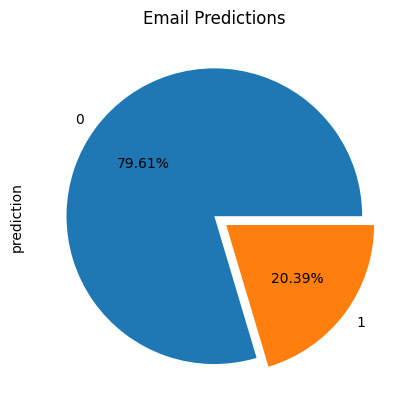

In [80]:
#create a frame containing email and prediction
result_df = pd.DataFrame({'email': dataToPredict, 'prediction': predictions})

# Plot the pie chart
result_df['prediction'].value_counts().plot.pie(autopct='%1.2f%%', radius=1, explode=[0, 0.1])
plt.title('Email Predictions')
plt.show()

on peut utiliser ce model pour classifier les eamil spam , meme si l'acurency est 0.98
 les donnees d'entrainnement ne sont pas suffisant car ilya plus des email normail que des spam